# Fifa 19 Players Dataset
## Understanding the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/data.csv', index_col=0)
df.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [2]:
df.shape

(18207, 88)

In [3]:
print("Numeric columns")
numeric_columns = list(df.select_dtypes(include="number").columns)

Numeric columns


In [4]:
print("String columns")
string_columns = list(df.select_dtypes(include="object").columns)

String columns


In [5]:
df[['Value','Wage','Contract Valid Until','Height','Weight','Release Clause']].head(10)

,Value,Wage,Contract Valid Until,Height,Weight,Release Clause
0,€110.5M,€565K,2021,5'7,159lbs,€226.5M
1,€77M,€405K,2022,6'2,183lbs,€127.1M
2,€118.5M,€290K,2022,5'9,150lbs,€228.1M
3,€72M,€260K,2020,6'4,168lbs,€138.6M
4,€102M,€355K,2023,5'11,154lbs,€196.4M
5,€93M,€340K,2020,5'8,163lbs,€172.1M
6,€67M,€420K,2020,5'8,146lbs,€137.4M
7,€80M,€455K,2021,6'0,190lbs,€164M
8,€51M,€380K,2020,6'0,181lbs,€104.6M
9,€68M,€94K,2021,6'2,192lbs,€144.5M


In [6]:
import math

def currency_to_float(x):
    if isinstance(x, str):
        v = float(x.replace('€','').replace('M','').replace('K',''))
        if x.find('K') == -1:
            f = 1000000.0
        else:
            f = 1000.0
        return v*f
    else:
        return np.nan

def height_to_float(x):
    if isinstance(x, str):
        fl = x.split('\'')
        i = int(fl[0])*12 + int(fl[1])
    else:
        i = np.nan
    return i

def weight_to_float(x):
    if isinstance(x, str):
        w = x.replace('lbs', '')
        i = int(w)
    else:
        i = np.nan
    return i

df['height_in'] = df['Height'].apply(lambda x: height_to_float(x))
df['value_in_MM_eur'] = df['Value'].apply(lambda x: currency_to_float(x)/1000000)
df['wage_in_MM_eur'] = df['Wage'].apply(lambda x: currency_to_float(x)/1000000)
df['release_in_MM_eur'] = df['Release Clause'].apply(lambda x: currency_to_float(x)/1000000)
df['weight_int'] = df['Weight'].apply(lambda x: weight_to_float(x))

In [7]:
df.head(10)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,height_in,value_in_MM_eur,wage_in_MM_eur,release_in_MM_eur,weight_int
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,11.0,15.0,14.0,8.0,€226.5M,67.0,110.5,0.565,226.5,159.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,11.0,15.0,14.0,11.0,€127.1M,74.0,77.0,0.405,127.1,183.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,9.0,15.0,15.0,11.0,€228.1M,69.0,118.5,0.290,228.1,150.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,85.0,87.0,88.0,94.0,€138.6M,76.0,72.0,0.260,138.6,168.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,13.0,5.0,10.0,13.0,€196.4M,71.0,102.0,0.355,196.4,154.0
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,12.0,6.0,8.0,8.0,€172.1M,68.0,93.0,0.340,172.1,163.0
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,9.0,7.0,14.0,9.0,€137.4M,68.0,67.0,0.420,137.4,146.0
7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,25.0,31.0,33.0,37.0,€164M,72.0,80.0,0.455,164.0,190.0
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,8.0,9.0,7.0,11.0,€104.6M,72.0,51.0,0.380,104.6,181.0
9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,92.0,78.0,88.0,89.0,€144.5M,74.0,68.0,0.094,144.5,192.0


In [8]:
df.select_dtypes(include="object").columns

Index(['Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Value',
       'Wage', 'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face',
       'Position', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause'],
      dtype='object')

In [9]:
df.select_dtypes(include="number").columns

Index(['ID', 'Age', 'Overall', 'Potential', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'height_in',
       'value_in_MM_eur', 'wage_in_MM_eur', 'release_in_MM_eur', 'weight_int'],
      dtype='object')

In [10]:
relevant_columns = ['Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type', 'Position',
                   'Age', 'Overall', 'Potential', 'Special',
                   'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
                   'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
                   'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
                    'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
                   'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
                   'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
                   'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
                   'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'height_in',
                   'value_in_MM_eur', 'wage_in_MM_eur', 'weight_int']

df_cleaned = df[relevant_columns]

(18207, 52)

In [12]:

df_cleaned = df_cleaned.dropna()
df_cleaned.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,height_in,value_in_MM_eur,wage_in_MM_eur,weight_int
count,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,...,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.00000,17918.000000,17918.000000,17918.000000,17918.000000
mean,25.105257,66.236801,71.329334,1598.111731,1.113908,2.947260,2.362875,19.643041,49.748856,45.581147,...,45.643208,16.590356,16.367675,16.205659,16.360308,16.68367,71.361034,2.448629,0.009884,165.968858
std,4.675372,6.929243,6.144098,272.983157,0.395495,0.660106,0.756309,16.008322,18.354989,19.512533,...,21.270735,17.661697,16.877771,16.468529,16.992206,17.91613,2.649740,5.631804,0.022143,15.604084
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,61.000000,0.000000,0.001000,110.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,24.000000,8.000000,8.000000,8.000000,8.000000,8.00000,69.000000,0.325000,0.001000,154.000000
50%,25.000000,66.000000,71.000000,1636.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,52.000000,11.000000,11.000000,11.000000,11.000000,11.00000,71.000000,0.700000,0.003000,165.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,64.000000,14.000000,14.000000,14.000000,14.000000,14.00000,73.000000,2.100000,0.009000,176.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,91.000000,90.000000,92.000000,91.000000,90.000000,94.00000,81.000000,118.500000,0.565000,243.000000


(array([1.7206e+04, 4.8400e+02, 1.3300e+02, 4.5000e+01, 1.8000e+01,
        1.7000e+01, 9.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  0.  ,  11.85,  23.7 ,  35.55,  47.4 ,  59.25,  71.1 ,  82.95,
         94.8 , 106.65, 118.5 ]),
 <a list of 10 Patch objects>)

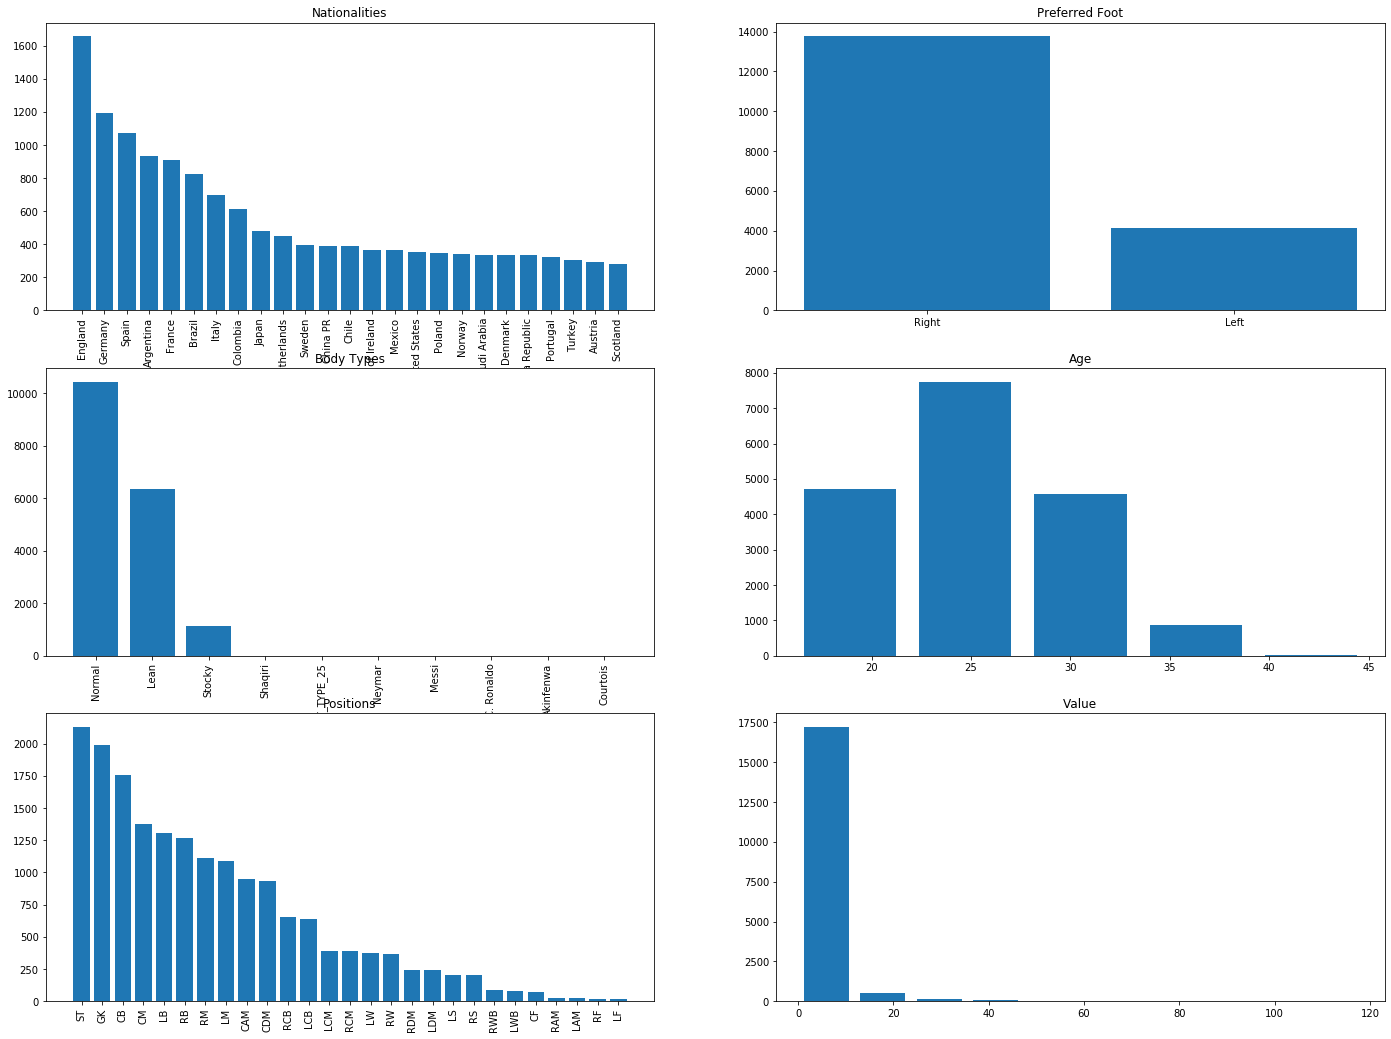

In [24]:
plt.figure(figsize=(24, 18))

plt.subplot(321)
nationality = df_cleaned["Nationality"].value_counts().sort_values(ascending = False)
plt.xticks(rotation=90)
plt.title('Nationalities')
plt.bar(nationality.index[0:25], nationality.values[0:25])

plt.subplot(322)
p_foot = df_cleaned["Preferred Foot"].value_counts()
plt.bar(p_foot.index, p_foot.values)
plt.title('Preferred Foot')

plt.subplot(323)
body_type = df_cleaned["Body Type"].value_counts()
plt.title('Body Types')
plt.xticks(rotation=90)
plt.bar(body_type.index, body_type.values)

plt.subplot(324)
age = df_cleaned["Age"]
plt.title('Age')
plt.hist(age.values, bins = 5, rwidth =0.8)

plt.subplot(325)
position = df_cleaned["Position"].value_counts().sort_values(ascending = False)
plt.title('Positions')
plt.xticks(rotation=90)
plt.bar(position.index, position.values)

plt.subplot(326)
wage = df_cleaned["value_in_MM_eur"]
plt.title('Value')
plt.hist(wage, bins = 10, rwidth =0.8)



In [65]:
plt.title

'Preferred Foot'

# Effect of variables on Value

## Correlation Matrix

In [31]:
import seaborn as sn
corr_data = df_cleaned.select_dtypes(include="number")

corr_matrix = corr_data.corr()


<function matplotlib.pyplot.show(*args, **kw)>

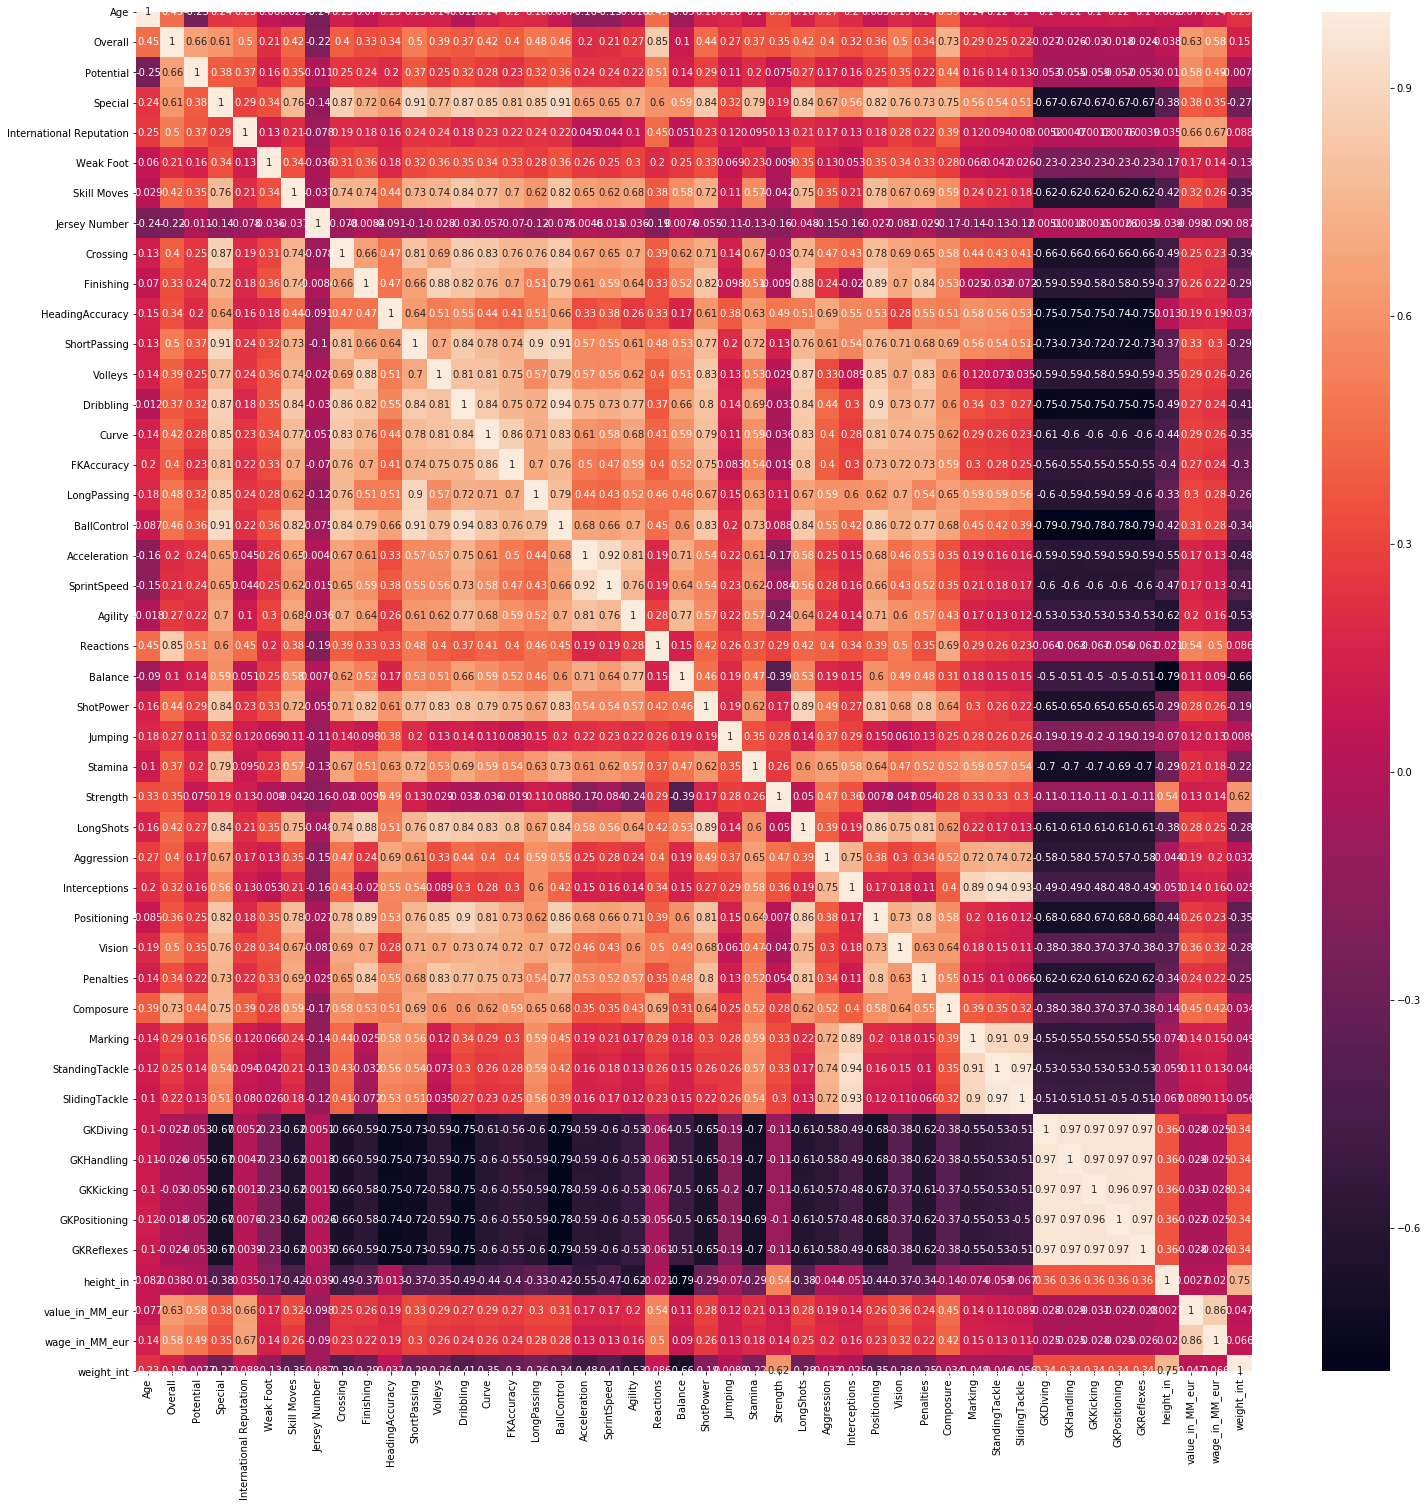

In [30]:
plt.figure(figsize=(25,25))
sn.heatmap(corr_matrix, annot=True)
plt.show

## Model Selection

In [35]:
X = df_cleaned[['Preferred Foot', 'Work Rate', 'Body Type', 'Position',
                   'Age', 'International Reputation', 'Weak Foot', 'Skill Moves',
                   'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
                   'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
                    'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
                   'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
                   'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
                   'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'height_in','weight_int']]

X = pd.get_dummies(X)

y =  df_cleaned['wage_in_MM_eur']

In [34]:
import scikit-learn as sklearn

,Age,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST
0,31,5.0,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,...,0,0,0,0,1,0,0,0,0,0
1,33,5.0,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,...,0,0,0,0,0,0,0,0,0,1
2,26,5.0,5.0,5.0,79.0,87.0,62.0,84.0,84.0,96.0,...,0,0,0,0,0,0,0,0,0,0
3,27,4.0,3.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,...,0,0,0,0,0,0,0,0,0,0
4,27,4.0,5.0,4.0,93.0,82.0,55.0,92.0,82.0,86.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,1.0,2.0,2.0,34.0,38.0,40.0,49.0,25.0,42.0,...,0,0,0,0,0,0,0,0,0,0
18203,19,1.0,2.0,2.0,23.0,52.0,52.0,43.0,36.0,39.0,...,0,0,0,0,0,0,0,0,0,1
18204,16,1.0,3.0,2.0,25.0,40.0,46.0,38.0,38.0,45.0,...,0,0,0,0,0,0,0,0,0,1
18205,17,1.0,3.0,2.0,44.0,50.0,39.0,42.0,40.0,51.0,...,0,0,0,0,0,0,0,1,0,0
